In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_binarry(file_path):
    import struct
    import math

    power = []
    age = []
    coordinate_x = []
    coordinate_y = []
    angle_tetta = []
    angle_phi = []
    energy = []
    time = []

    with open(file_path, 'rb') as binary_file:
        for i in range(100000):
            binary_file.read(4 * 5)

            tetta = struct.unpack('f', binary_file.read(4))[0]
            angle_tetta.append(tetta)

            phi = struct.unpack('f', binary_file.read(4))[0]
            angle_phi.append(phi)

            x0 = struct.unpack('f', binary_file.read(4))[0]
            coordinate_x.append(x0)

            y0 = struct.unpack('f', binary_file.read(4))[0]
            coordinate_y.append(y0)

            binary_file.read(4 * 5)

            power_eas = struct.unpack('f', binary_file.read(4))[0]
            power.append(math.log10(power_eas))

            age_eas = struct.unpack('f', binary_file.read(4))[0]
            age.append(age_eas)

            binary_file.read(4 * 1565)
            energy_release = struct.unpack('f' * 36, binary_file.read(4 * 36))
            energy.append(energy_release)

            binary_file.read(4)
            t = struct.unpack('f' * 144, binary_file.read(4 * 144))
            threshold_time = t[::4]
            time.append(threshold_time)

    # Собираем всё в DataFrame
    df = pd.DataFrame({
        'power': power,
        'age': age,
        'x': coordinate_x,
        'y': coordinate_y,
        'tetta': angle_tetta,
        'phi': angle_phi,
        'energy': energy,
        'threshold_time': time,
    })

    return df


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
df = read_binarry('/content/drive/MyDrive/spe27p_100k_2022_correct.dat')
df.head()

,power,age,x,y,tetta,phi,energy,threshold_time
0,4.166507,1.444716,13.572407,37.022316,37.367474,47.313324,"(0.10191129148006439, 11.324358940124512, 13.0...","(-1.0, 91830.7265625, 91844.828125, 91830.7109..."
1,4.933104,1.430547,40.330677,-61.980999,28.912228,236.400421,"(10.563158988952637, 0.0, 7.604449272155762, 1...","(61243.13671875, -1.0, 61215.59375, 61216.8359..."
2,4.133581,1.459046,-1.046695,-63.925430,37.267426,182.086060,"(0.0, 0.34477588534355164, 0.35262614488601685...","(-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 78681.062..."
3,5.190620,1.326983,40.293152,-21.836197,3.205503,201.268890,"(34.960296630859375, 40.36423873901367, 6.7627...","(52147.2421875, 52211.25, 52142.87890625, 5213..."
4,5.021614,1.336776,15.542248,10.037846,6.299241,108.097626,"(79.6240234375, 29.508312225341797, 60.4609146...","(88044.953125, 88053.078125, 88046.9453125, 88..."


## Данные

In [6]:
df.shape

(100000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   power           100000 non-null  float64
 1   age             100000 non-null  float64
 2   x               100000 non-null  float64
 3   y               100000 non-null  float64
 4   tetta           100000 non-null  float64
 5   phi             100000 non-null  float64
 6   energy          100000 non-null  object 
 7   threshold_time  100000 non-null  object 
dtypes: float64(6), object(2)
memory usage: 6.1+ MB


In [8]:
def raspakovka(df, col):
  new_df = df[col].astype(str).str.replace('(', '').str.replace(')', '')
  new_df = new_df.str.split(',', expand=True)
  new_df = new_df.apply(lambda col: col.astype(float))
  cols = new_df.columns
  new_df.columns = np.array([col + str(val) for val in cols])
  return new_df

In [104]:
energy = raspakovka(df, 'energy')
threshold_time = raspakovka(df, 'threshold_time')

In [10]:
threshold_time.head()

,threshold_time0,threshold_time1,threshold_time2,threshold_time3,threshold_time4,threshold_time5,threshold_time6,threshold_time7,threshold_time8,threshold_time9,...,threshold_time26,threshold_time27,threshold_time28,threshold_time29,threshold_time30,threshold_time31,threshold_time32,threshold_time33,threshold_time34,threshold_time35
0,-1.000000,91830.726562,91844.828125,91830.710938,91806.085938,91781.867188,-1.000000,91779.937500,91739.953125,91759.718750,...,91763.781250,91759.656250,91774.828125,-1.000000,-1.000000,91810.023438,-1.000000,91878.492188,-1.000000,-1.000000
1,61243.136719,-1.000000,61215.593750,61216.835938,61308.511719,61290.945312,61250.316406,-1.000000,61253.535156,61278.941406,...,61375.957031,-1.000000,61293.765625,61283.878906,61253.312500,61261.664062,61192.441406,61199.957031,61166.894531,61236.789062
2,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,78681.062500,78706.679688,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,78678.609375,78703.148438
3,52147.242188,52211.250000,52142.878906,52139.476562,52156.183594,-1.000000,52161.449219,52142.605469,52123.867188,52123.531250,...,52187.480469,52178.167969,52173.789062,52171.929688,52172.902344,52173.003906,52137.703125,52150.824219,52160.316406,52141.460938
4,88044.953125,88053.078125,88046.945312,88050.554688,88034.984375,88035.343750,88069.812500,88038.289062,88030.554688,88021.523438,...,88065.773438,88074.195312,88085.453125,88084.914062,88094.664062,88097.500000,88057.523438,88064.109375,88071.828125,88070.187500


<Axes: >

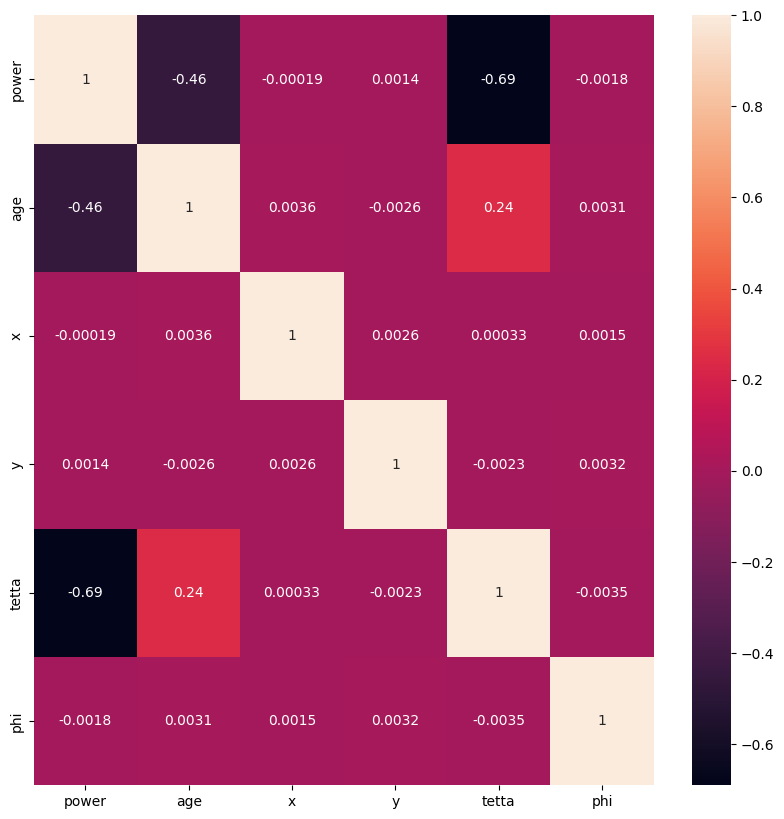

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.drop(['energy', 'threshold_time'], axis=1).corr(), annot=True)

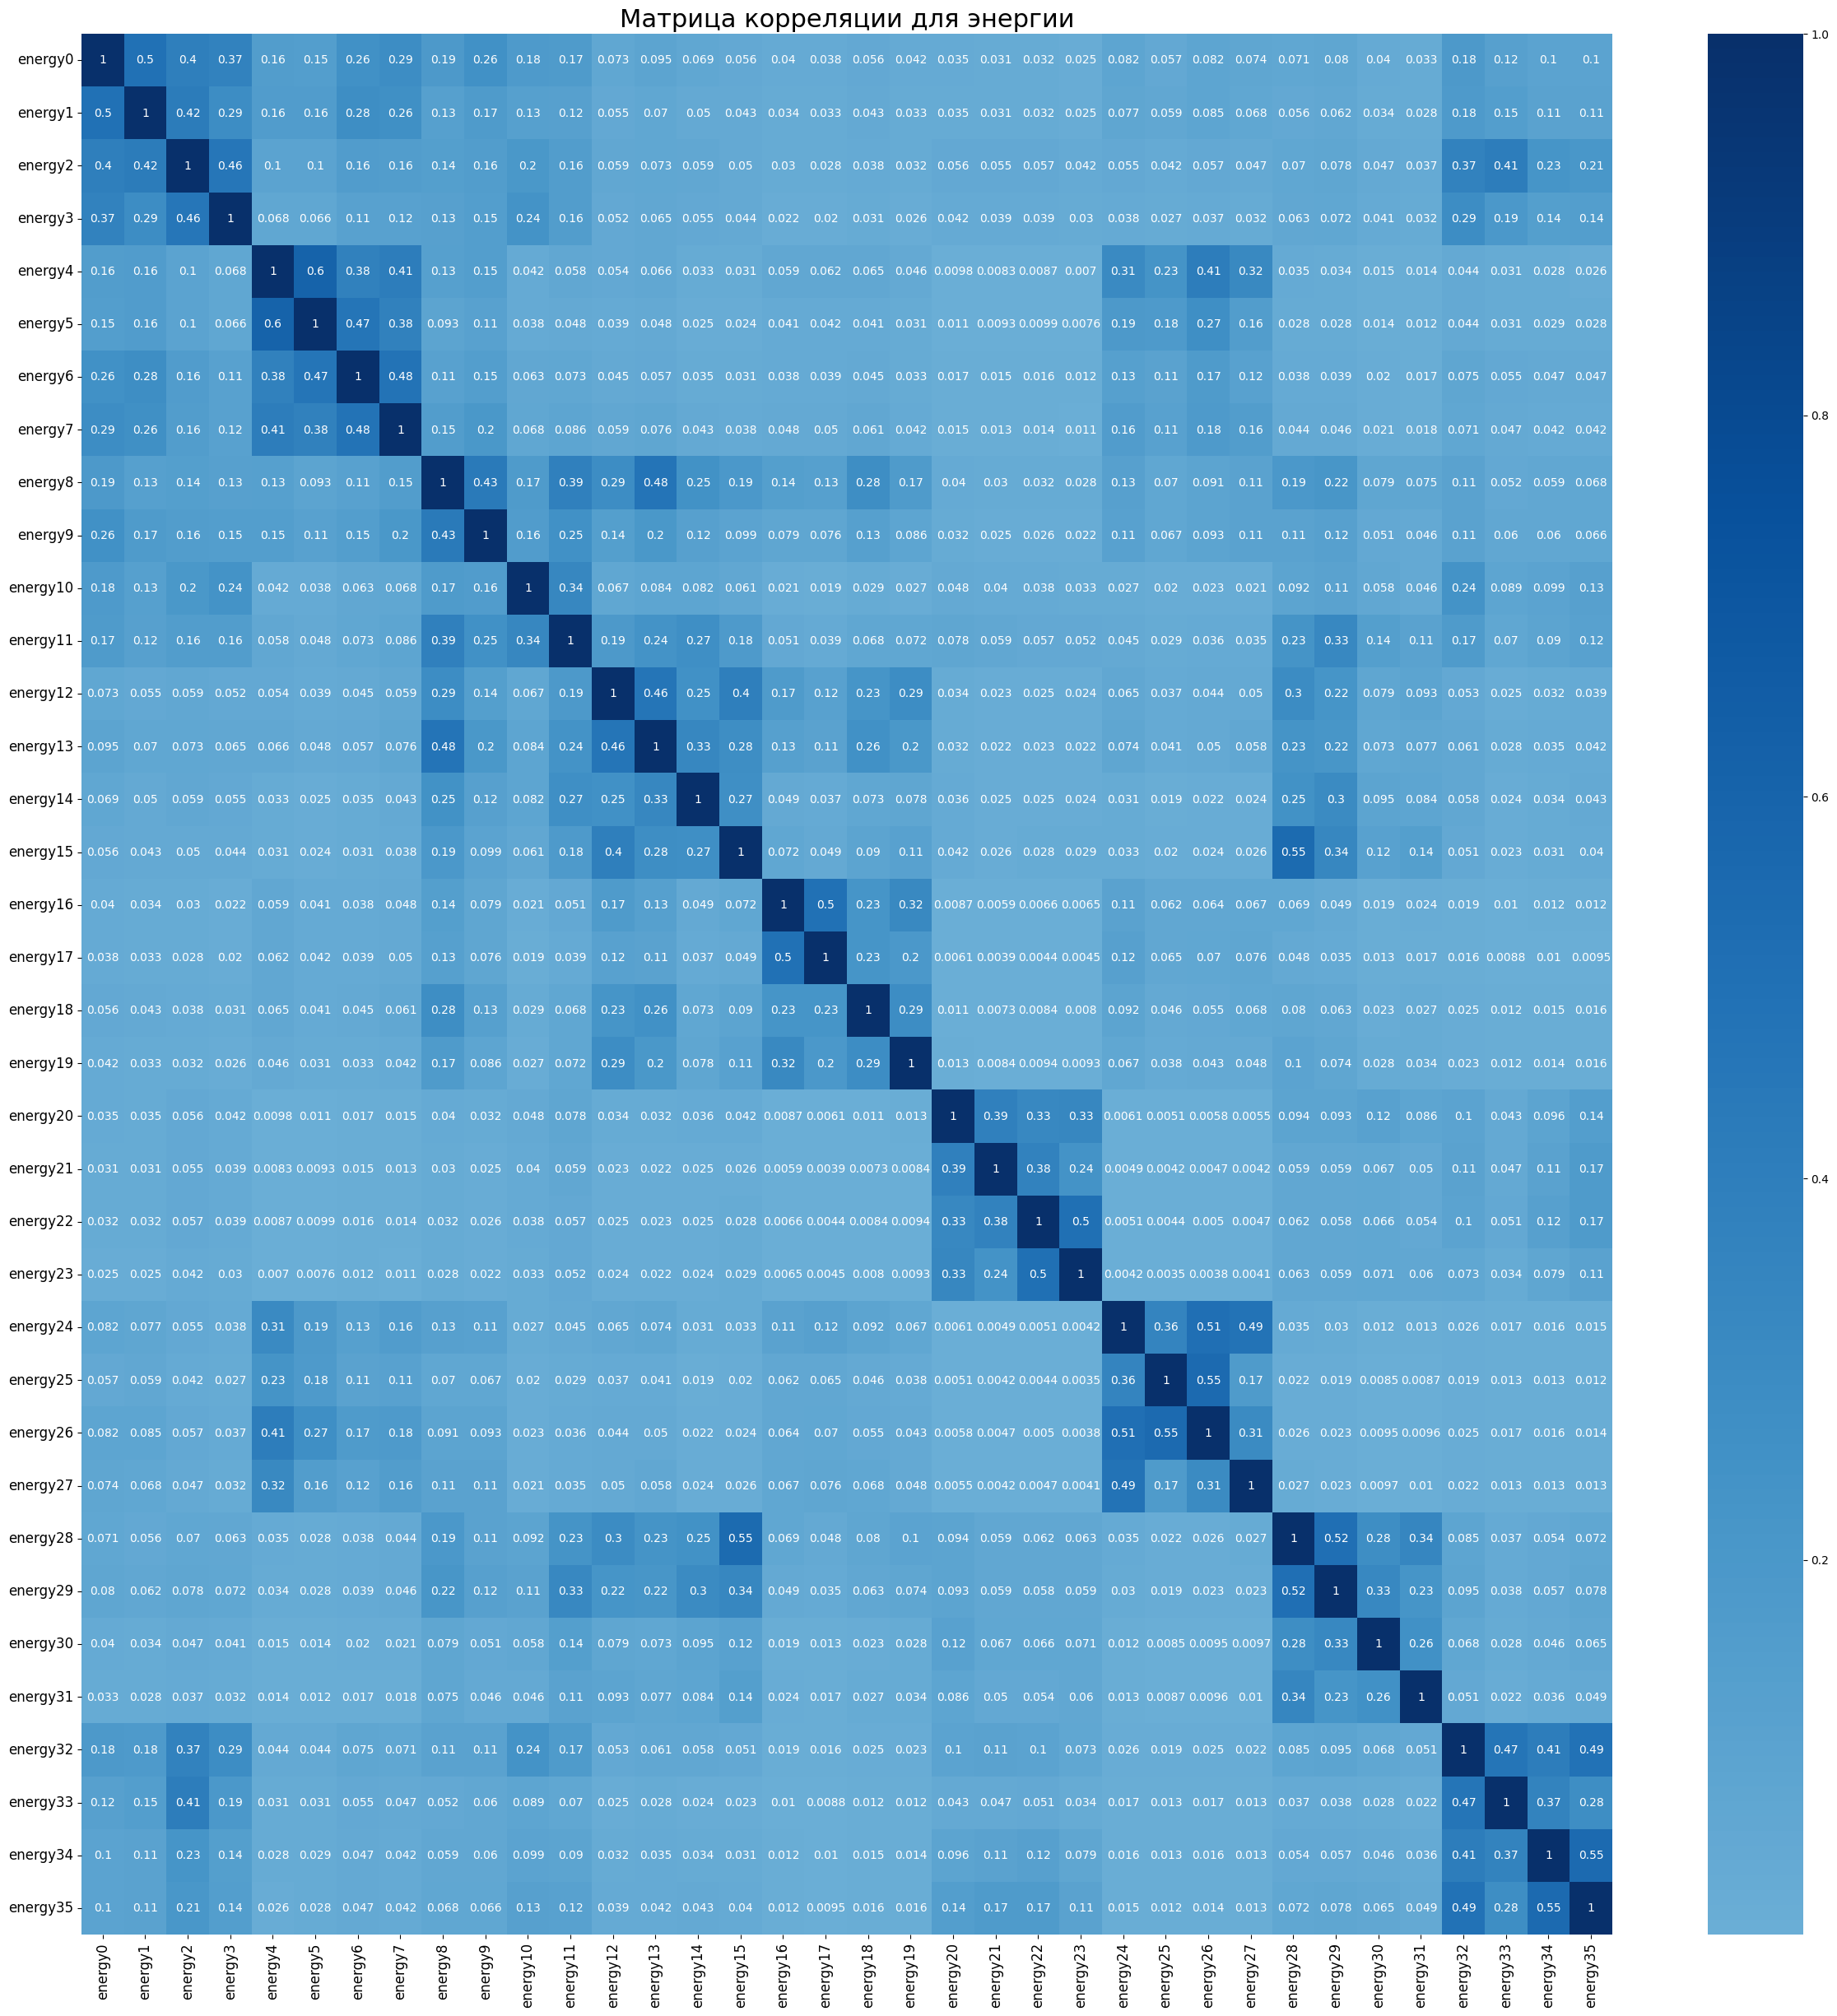

In [38]:
plt.figure(figsize=(30,30))
a = energy.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции для энергии", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

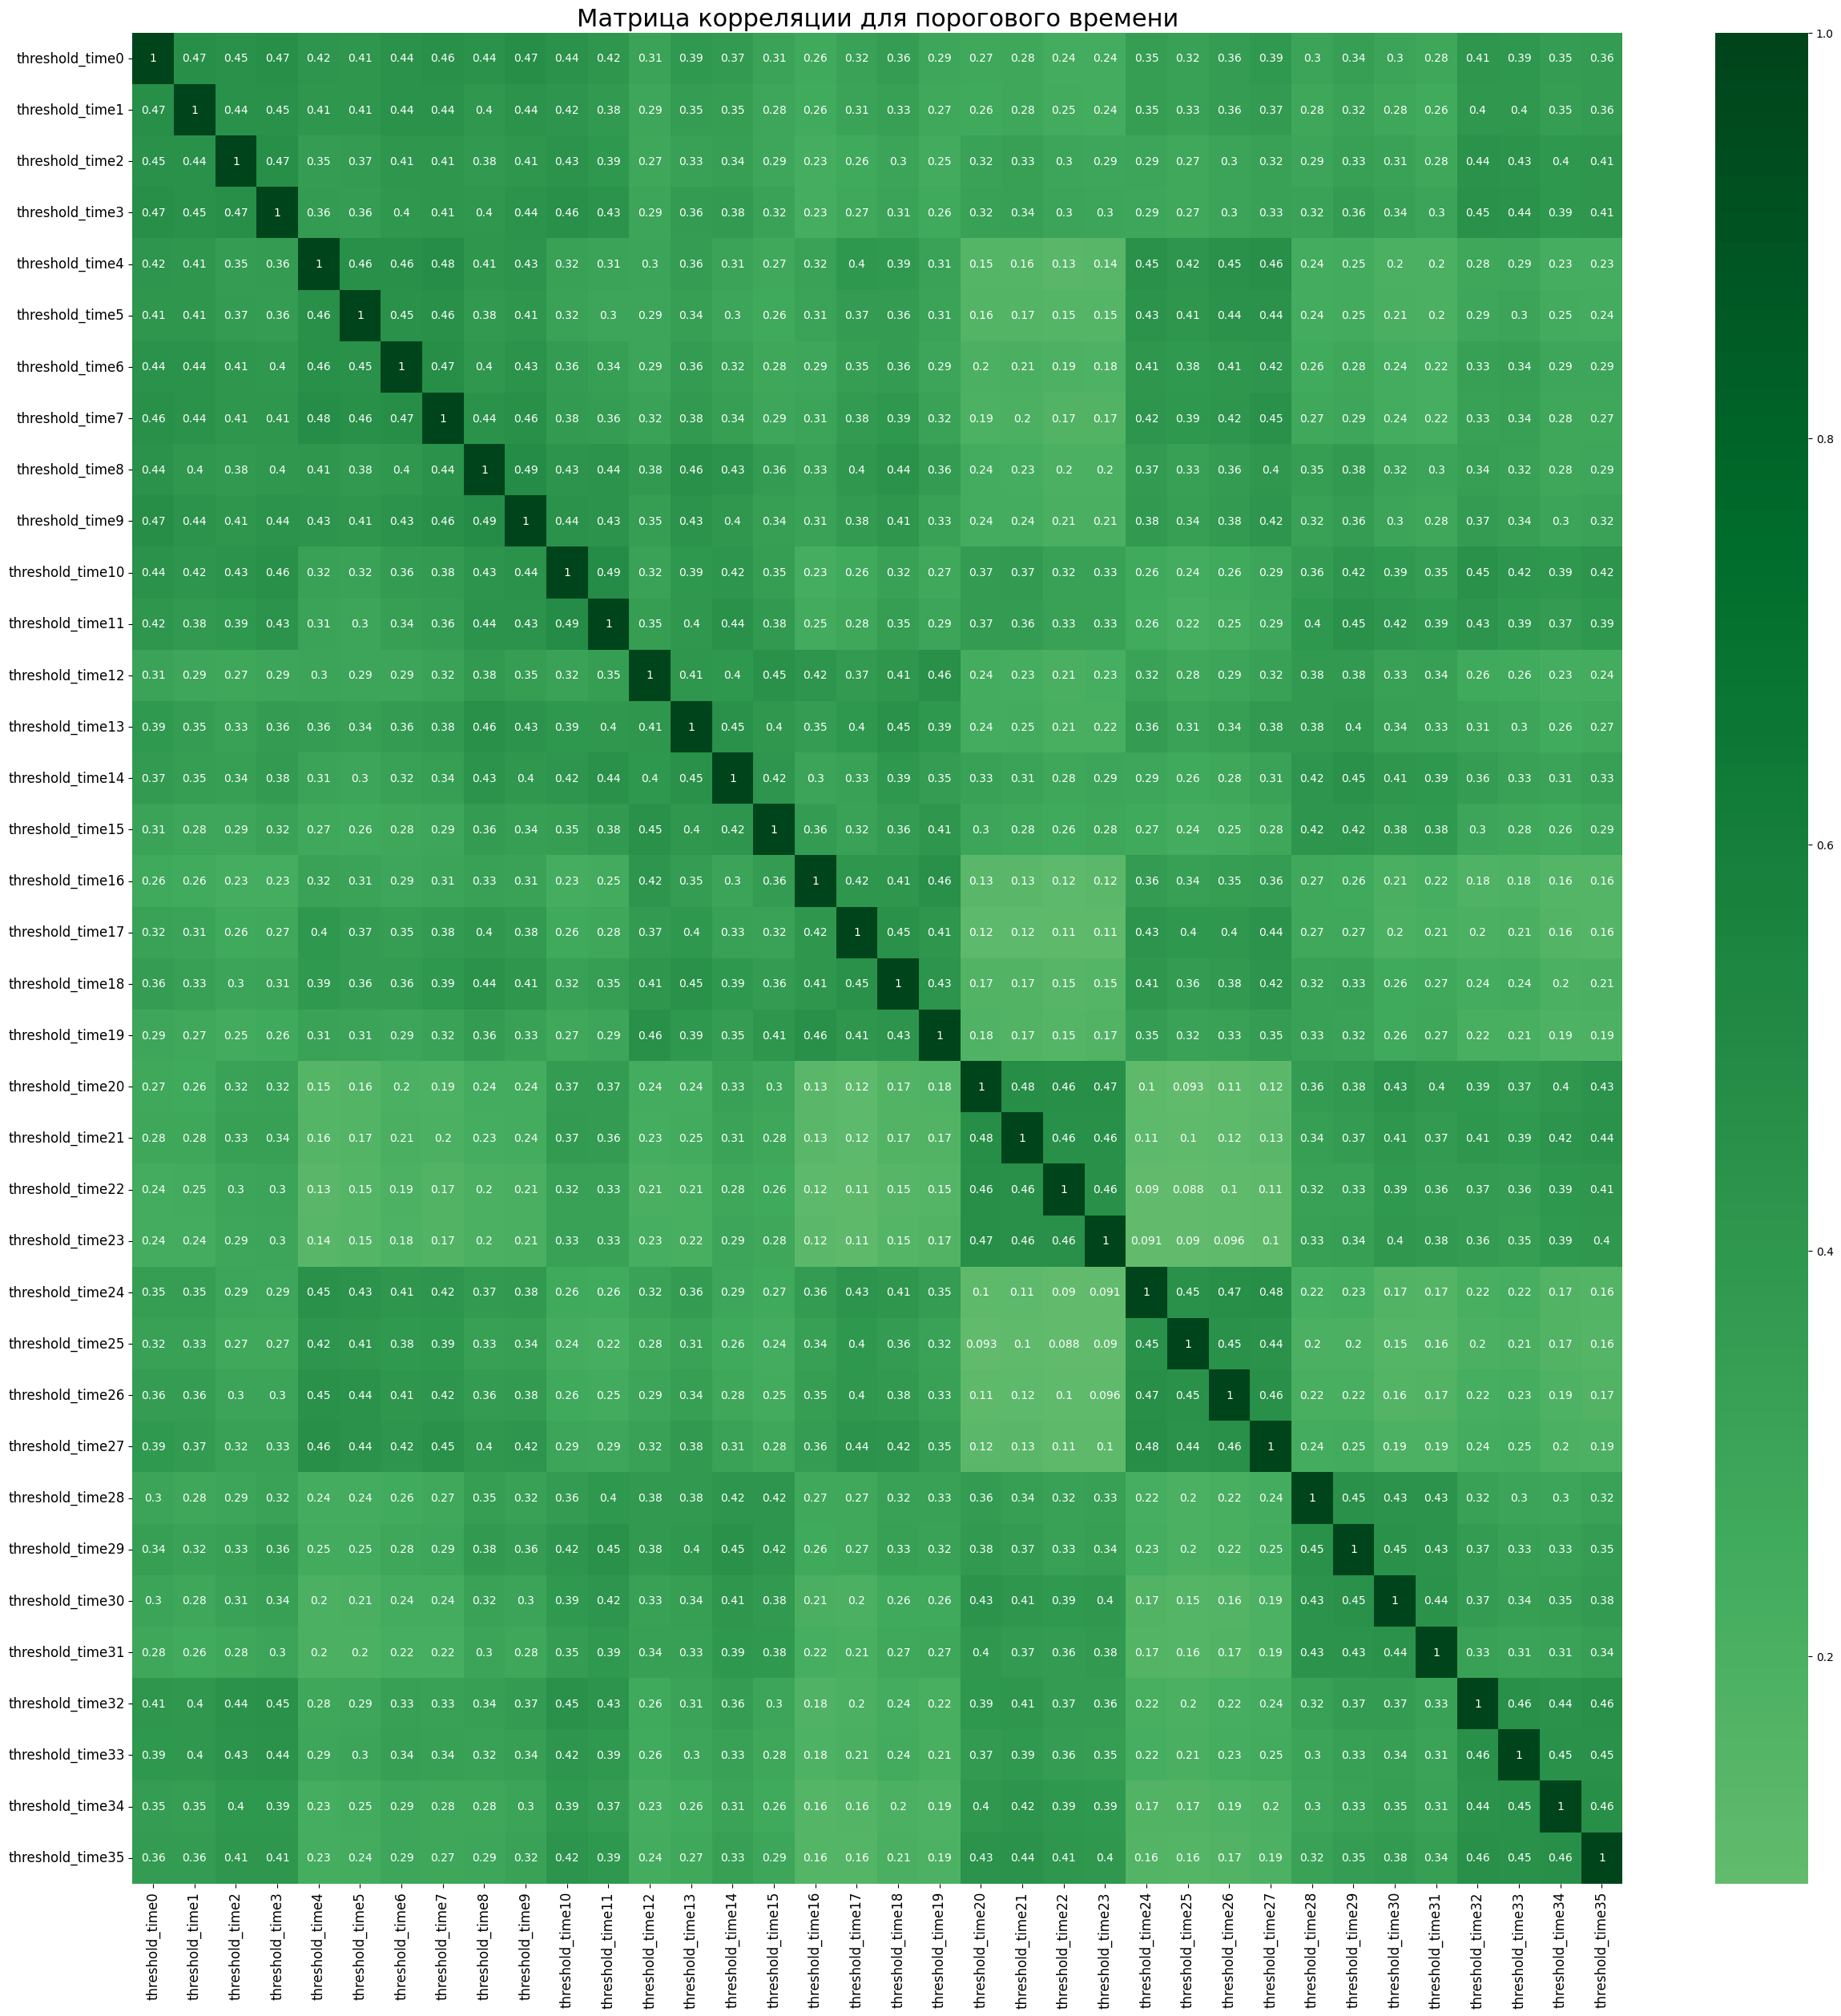

In [41]:
plt.figure(figsize=(30,30))
a = threshold_time.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Greens', center=0, annot=True)
plt.title("Матрица корреляции для порогового времени", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [130]:
new_df = pd.concat([energy, threshold_time], axis=1)
new_df.head()

,energy0,energy1,energy2,energy3,energy4,energy5,energy6,energy7,energy8,energy9,...,threshold_time32,threshold_time33,threshold_time34,threshold_time35,t0,threshold_time_min,threshold_time_max,threshold_time_mean,threshold_time_std,threshold_time_median
0,0.101911,11.324359,13.000817,23.782166,21.877735,57.119301,0.033711,8.516803,46.517628,36.661163,...,-1.000000,91878.492188,-1.000000,-1.000000,91758.356771,91687.640625,91933.914062,91797.031250,61.988007,91779.937500
1,10.563159,0.000000,7.604449,15.454450,38.223766,7.655221,17.160658,3.609518,8.726596,38.333645,...,61192.441406,61199.957031,61166.894531,61236.789062,61258.738281,61166.894531,61382.472656,61267.357422,61.503052,61257.599609
2,0.000000,0.344776,0.352626,0.072466,0.000000,0.000000,9.323197,8.849572,0.574801,0.000000,...,-1.000000,-1.000000,78678.609375,78703.148438,0.000000,78678.609375,78788.273438,78730.693080,45.606588,78706.679688
3,34.960297,40.364239,6.762777,71.258392,28.369164,0.362314,16.302969,47.820805,81.252556,47.688992,...,52137.703125,52150.824219,52160.316406,52141.460938,52121.010742,52118.199219,52211.250000,52164.342831,23.663881,52172.953125
4,79.624023,29.508312,60.460915,105.564728,42.283855,46.161194,79.481194,60.743137,828.470459,274.521637,...,88057.523438,88064.109375,88071.828125,88070.187500,88033.404297,88021.523438,88124.820312,88066.832812,22.642614,88070.187500


In [119]:
for index, row in df.iterrows():
    a = np.array([x for x in row['energy'] if x != 0])
    if len(a) == 0:
        a = np.array([0])
    energy.loc[index, 'energy_min'] = np.min(a, axis=0)
    energy.loc[index, 'energy_max'] = np.max(a, axis=0)
    energy.loc[index, 'energy_mean'] = np.mean(a, axis=0)
    energy.loc[index, 'energy_std'] = np.std(a, axis=0)
    energy.loc[index, 'energy_median'] = np.median(a, axis=0)
    a = np.array([x for x in row['threshold_time'] if x != -1])
    if len(a) == 0:
        a = np.array([0])
    threshold_time.loc[index, 'threshold_time_min'] = np.min(a, axis=0)
    threshold_time.loc[index, 'threshold_time_max'] = np.max(a, axis=0)
    threshold_time.loc[index, 'threshold_time_mean'] = np.mean(a, axis=0)
    threshold_time.loc[index, 'threshold_time_std'] = np.std(a, axis=0)
    threshold_time.loc[index, 'threshold_time_median'] = np.median(a, axis=0)

In [120]:
new_df.head()

,energy0,energy1,energy2,energy3,energy4,energy5,energy6,energy7,energy8,energy9,...,threshold_time27,threshold_time28,threshold_time29,threshold_time30,threshold_time31,threshold_time32,threshold_time33,threshold_time34,threshold_time35,t0
0,0.101911,11.324359,13.000817,23.782166,21.877735,57.119301,0.033711,8.516803,46.517628,36.661163,...,91759.656250,91774.828125,-1.000000,-1.000000,91810.023438,-1.000000,91878.492188,-1.000000,-1.000000,91758.356771
1,10.563159,0.000000,7.604449,15.454450,38.223766,7.655221,17.160658,3.609518,8.726596,38.333645,...,-1.000000,61293.765625,61283.878906,61253.312500,61261.664062,61192.441406,61199.957031,61166.894531,61236.789062,61258.738281
2,0.000000,0.344776,0.352626,0.072466,0.000000,0.000000,9.323197,8.849572,0.574801,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,78678.609375,78703.148438,0.000000
3,34.960297,40.364239,6.762777,71.258392,28.369164,0.362314,16.302969,47.820805,81.252556,47.688992,...,52178.167969,52173.789062,52171.929688,52172.902344,52173.003906,52137.703125,52150.824219,52160.316406,52141.460938,52121.010742
4,79.624023,29.508312,60.460915,105.564728,42.283855,46.161194,79.481194,60.743137,828.470459,274.521637,...,88074.195312,88085.453125,88084.914062,88094.664062,88097.500000,88057.523438,88064.109375,88071.828125,88070.187500,88033.404297


## Пробник обучения

In [33]:
X = new_df.values

print(X)

[[ 1.01911291e-01  1.13243589e+01  1.30008173e+01 ...  9.18784922e+04
  -1.00000000e+00 -1.00000000e+00]
 [ 1.05631590e+01  0.00000000e+00  7.60444927e+00 ...  6.11999570e+04
   6.11668945e+04  6.12367891e+04]
 [ 0.00000000e+00  3.44775885e-01  3.52626145e-01 ... -1.00000000e+00
   7.86786094e+04  7.87031484e+04]
 ...
 [ 0.00000000e+00  2.33896494e-01  0.00000000e+00 ... -1.00000000e+00
   1.11038570e+05 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.35683250e+00 ... -1.00000000e+00
  -1.00000000e+00  1.66369500e+05]
 [ 4.83714485e+01  3.01007023e+01  1.23407269e+01 ...  1.38509766e+05
  -1.00000000e+00 -1.00000000e+00]]


In [34]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)
print(X_norm)

[[5.55214193e-07 5.27947603e-05 1.00574259e-04 ... 2.02117688e-01
  0.00000000e+00 0.00000000e+00]
 [5.75482433e-05 0.00000000e+00 5.88279826e-05 ... 1.34630652e-01
  1.34549004e-01 1.34707277e-01]
 [0.00000000e+00 1.60736341e-06 2.72791414e-06 ... 0.00000000e+00
  1.73068947e-01 1.73128744e-01]
 ...
 [0.00000000e+00 1.09043782e-06 0.00000000e+00 ... 0.00000000e+00
  2.44250087e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.46484157e-05 ... 0.00000000e+00
  0.00000000e+00 3.65972014e-01]
 [2.63528353e-04 1.40331066e-04 9.54678030e-05 ... 3.04697762e-01
  0.00000000e+00 0.00000000e+00]]


In [17]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression  # Импорт линейной регрессии

In [37]:
models = {LinearRegression(): 'lin_reg', AdaBoostRegressor(): 'ada_boost', RandomForestRegressor(): 'rand_forest',
          GaussianProcessRegressor(): 'gaus', KNeighborsRegressor(): 'knn_reg', DecisionTreeRegressor(): 'des_tree'}

y_cols = ['power', 'age', 'x', 'y', 'tetta', 'phi']

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df_pred = []
columns = ['model']

for model in models.keys():
  row = [models[model]]
  for y in y_cols:
    Y = df[y].values
    X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Предсказание
    y_pred = model.predict(X_test)

    # Сравнение с тестами
    #print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    #print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    #print('R2 score:', r2_score(y_test, y_pred))

    columns.extend([y + ' MAE', y + ' MSE', y + ' R2'])
    row.extend([mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)])
  df_pred.append(row)

df_pred = pd.DataFrame(df_pred, columns=columns)

NameError: name 'models' is not defined

In [ ]:
df_pred

## Углы Тетта и Фи

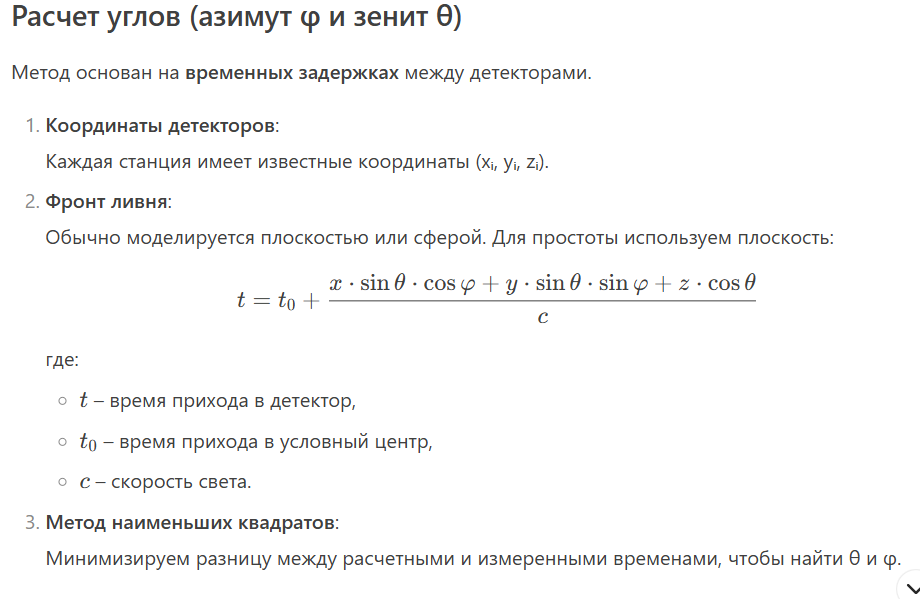

углы можно предсказать по их синусам и косинусам из формулы

In [121]:
y = df[['tetta', 'phi']]
y

,tetta,phi
0,37.367474,47.313324
1,28.912228,236.400421
2,37.267426,182.086060
3,3.205503,201.268890
4,6.299241,108.097626
...,...,...
99995,44.537529,31.058533
99996,16.121550,158.978851
99997,46.820038,13.862854
99998,33.087467,157.593292


In [122]:
y['sin_tetta'] = np.sin(np.radians(y['tetta']))
y['cos_tetta'] = np.cos(np.radians(y['tetta']))
y['sin_phi'] = np.sin(np.radians(y['phi']))
y['cos_phi'] = np.cos(np.radians(y['phi']))

y

/tmp/ipython-input-122-2314067866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['sin_tetta'] = np.sin(np.radians(y['tetta']))
/tmp/ipython-input-122-2314067866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['cos_tetta'] = np.cos(np.radians(y['tetta']))
/tmp/ipython-input-122-2314067866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,tetta,phi,sin_tetta,cos_tetta,sin_phi,cos_phi
0,37.367474,47.313324,0.606925,0.794759,0.735072,0.677989
1,28.912228,236.400421,0.483469,0.875361,-0.832925,-0.553385
2,37.267426,182.086060,0.605536,0.795818,-0.036401,-0.999337
3,3.205503,201.268890,0.055917,0.998435,-0.362745,-0.931888
4,6.299241,108.097626,0.109721,0.993962,0.950529,-0.310637
...,...,...,...,...,...,...
99995,44.537529,31.058533,0.701376,0.712791,0.515913,0.856641
99996,16.121550,158.978851,0.277676,0.960675,0.358713,-0.933448
99997,46.820038,13.862854,0.729208,0.684292,0.239599,0.970872
99998,33.087467,157.593292,0.545919,0.837838,0.381179,-0.924501


In [123]:
positive_times = threshold_time[['threshold_time8', 'threshold_time9', 'threshold_time10', 'threshold_time11']].where(lambda x: x > 0)
threshold_time['t0'] = positive_times.mean(axis=1) # время отклика в центре

threshold_time['t0'].fillna(0, inplace=True)

/tmp/ipython-input-123-903033066.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  threshold_time['t0'].fillna(0, inplace=True)


In [124]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(threshold_time.values)
print(X_norm)

[[0.         0.1678689  0.20206125 ... 0.1677985  0.02446343 0.16776792]
 [0.140585   0.         0.13467679 ... 0.11199241 0.02427204 0.11197502]
 [0.         0.         0.         ... 0.14391415 0.01799854 0.14387083]
 ...
 [0.         0.         0.         ... 0.20279296 0.02703044 0.20284156]
 [0.         0.         0.36591797 ... 0.30417969 0.02157207 0.3041487 ]
 [0.31788314 0.25311452 0.30465575 ... 0.25321219 0.02185489 0.25318726]]


In [125]:
models = {LinearRegression(): 'lin_reg', AdaBoostRegressor(): 'ada_boost', RandomForestRegressor(): 'rand_forest',
          GaussianProcessRegressor(): 'gaus', KNeighborsRegressor(): 'knn_reg', DecisionTreeRegressor(): 'des_tree'}

#models = {LinearRegression(): 'lin_reg', RandomForestRegressor(): 'rand_forest'}

y_cols = ['tetta', 'sin_tetta', 'cos_tetta', 'phi', 'sin_phi', 'cos_phi']

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df_pred = []
columns = ['model']

#for model in models.keys():
row = ['lin_reg']
for col in y_cols:
  model = RandomForestRegressor()
  Y = y[col].values
  X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Предсказание
  y_pred = model.predict(X_test)

  columns.extend([col + ' MAE', col + ' MSE', col + ' R2'])
  row.extend([mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)])
df_pred.append(row)

df_pred = pd.DataFrame(df_pred, columns=columns)

KeyboardInterrupt: 

In [128]:
df_pred

,model,tetta MAE,tetta MSE,tetta R2,sin_tetta MAE,sin_tetta MSE,sin_tetta R2,cos_tetta MAE,cos_tetta MSE,cos_tetta R2,phi MAE,phi MSE,phi R2,sin_phi MAE,sin_phi MSE,sin_phi R2,cos_phi MAE,cos_phi MSE,cos_phi R2
0,lin_reg,4.847955,39.762167,0.715886,0.073748,0.009587,0.699986,0.04118,0.002909,0.725748,88.307032,10542.907676,0.024234,0.622184,0.485221,0.027105,0.544056,0.393853,0.218021


## Координаты оси ливня (x, y)

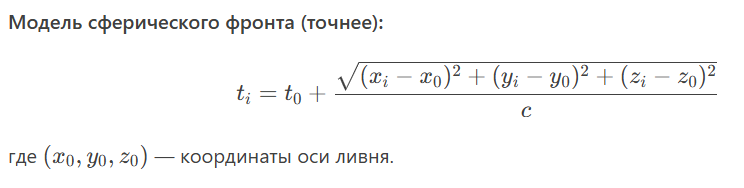

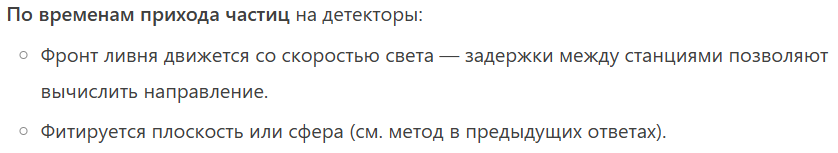

есть вариант предсказать квадраты координат, т.к функция квадратичная

In [131]:
y = df[['x', 'y']]
y

,x,y
0,13.572407,37.022316
1,40.330677,-61.980999
2,-1.046695,-63.925430
3,40.293152,-21.836197
4,15.542248,10.037846
...,...,...
99995,36.338993,32.139332
99996,-29.983866,-38.277843
99997,18.329506,-13.626085
99998,-36.200687,-53.555149


In [132]:
y['x^2'] = y['x']**2
y['y^2'] = y['y']**2

y

/tmp/ipython-input-132-2189120915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['x^2'] = y['x']**2
/tmp/ipython-input-132-2189120915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y^2'] = y['y']**2


,x,y,x^2,y^2
0,13.572407,37.022316,184.210225,1370.651880
1,40.330677,-61.980999,1626.563510,3841.644236
2,-1.046695,-63.925430,1.095571,4086.460639
3,40.293152,-21.836197,1623.538086,476.819495
4,15.542248,10.037846,241.561466,100.758345
...,...,...,...,...
99995,36.338993,32.139332,1320.522418,1032.936650
99996,-29.983866,-38.277843,899.032205,1465.193301
99997,18.329506,-13.626085,335.970787,185.670200
99998,-36.200687,-53.555149,1310.489769,2868.153993


In [133]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(new_df.values)
print(X_norm)

[[5.55214193e-07 5.27947603e-05 1.00574259e-04 ... 1.67798498e-01
  2.44634263e-02 1.67767922e-01]
 [5.75482433e-05 0.00000000e+00 5.88279826e-05 ... 1.11992408e-01
  2.42720398e-02 1.11975019e-01]
 [0.00000000e+00 1.60736341e-06 2.72791414e-06 ... 1.43914153e-01
  1.79985364e-02 1.43870834e-01]
 ...
 [0.00000000e+00 1.09043782e-06 0.00000000e+00 ... 2.02792955e-01
  2.70304371e-02 2.02841559e-01]
 [0.00000000e+00 0.00000000e+00 6.46484157e-05 ... 3.04179694e-01
  2.15720709e-02 3.04148700e-01]
 [2.63528353e-04 1.40331066e-04 9.54678030e-05 ... 2.53212194e-01
  2.18548942e-02 2.53187265e-01]]


In [134]:
models = {LinearRegression(): 'lin_reg', AdaBoostRegressor(): 'ada_boost', RandomForestRegressor(): 'rand_forest',
          GaussianProcessRegressor(): 'gaus', KNeighborsRegressor(): 'knn_reg', DecisionTreeRegressor(): 'des_tree'}

y_cols = ['x', 'x^2', 'y', 'y^2']

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df_pred = []
columns = ['model']

model = LinearRegression()
row = ['lin_reg']
for col in y_cols:
  Y = y[col].values
  X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Предсказание
  y_pred = model.predict(X_test)

  columns.extend([col + ' MAE', col + ' MSE', col + ' R2'])
  row.extend([mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)])
df_pred.append(row)

df_pred = pd.DataFrame(df_pred, columns=columns)

In [136]:
df_pred

,model,x MAE,x MSE,x R2,x^2 MAE,x^2 MSE,x^2 R2,y MAE,y MSE,y R2,y^2 MAE,y^2 MSE,y^2 R2
0,lin_reg,14.406347,394.62802,0.25257,390.104668,230555.115505,0.022578,19.501509,658.006531,0.569675,1013.794402,1.647816e+06,0.140338


## Возраст ливня

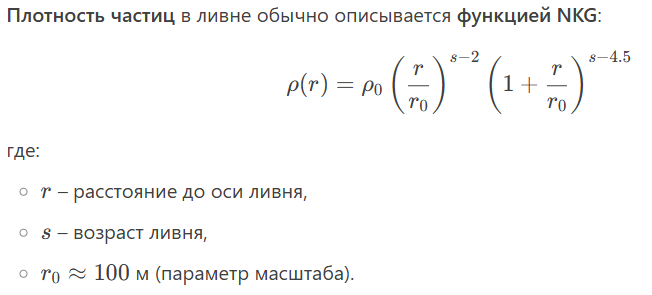

In [ ]:
# энергия первой частицы
energy['e0'] =

In [145]:
y = df['age']

In [146]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(new_df)
print(X_norm)

[[5.55214193e-07 5.27947603e-05 1.00574259e-04 ... 1.67798498e-01
  2.44634263e-02 1.67767922e-01]
 [5.75482433e-05 0.00000000e+00 5.88279826e-05 ... 1.11992408e-01
  2.42720398e-02 1.11975019e-01]
 [0.00000000e+00 1.60736341e-06 2.72791414e-06 ... 1.43914153e-01
  1.79985364e-02 1.43870834e-01]
 ...
 [0.00000000e+00 1.09043782e-06 0.00000000e+00 ... 2.02792955e-01
  2.70304371e-02 2.02841559e-01]
 [0.00000000e+00 0.00000000e+00 6.46484157e-05 ... 3.04179694e-01
  2.15720709e-02 3.04148700e-01]
 [2.63528353e-04 1.40331066e-04 9.54678030e-05 ... 2.53212194e-01
  2.18548942e-02 2.53187265e-01]]


In [147]:
models = {LinearRegression(): 'lin_reg', AdaBoostRegressor(): 'ada_boost', RandomForestRegressor(): 'rand_forest',
          GaussianProcessRegressor(): 'gaus', KNeighborsRegressor(): 'knn_reg', DecisionTreeRegressor(): 'des_tree'}
models = {LinearRegression(): 'lin_reg'}

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df_pred = []
columns = ['model']

for model in models.keys():
  row = [models[model]]
  Y = y
  X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Предсказание
  y_pred = model.predict(X_test)

  columns.extend(['age' + ' MAE', 'age' + ' MSE', 'age' + ' R2'])
  row.extend([mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)])
  df_pred.append(row)

df_pred = pd.DataFrame(df_pred, columns=columns)

In [151]:
df_pred

,model,age MAE,age MSE,age R2
0,lin_reg,0.045238,0.003698,0.103652


## Мощность ливня

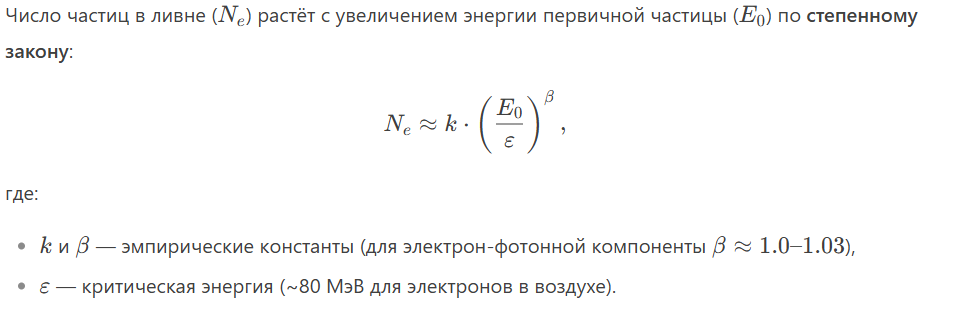

In [ ]:
# энергия первой частицы
energy['e0'] =

In [142]:
y = df['power']

In [81]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(new_df)
print(X_norm)

[[5.55214193e-07 5.27947603e-05 1.00574259e-04 ... 2.02117688e-01
  0.00000000e+00 0.00000000e+00]
 [5.75482433e-05 0.00000000e+00 5.88279826e-05 ... 1.34630652e-01
  1.34549004e-01 1.34707277e-01]
 [0.00000000e+00 1.60736341e-06 2.72791414e-06 ... 0.00000000e+00
  1.73068947e-01 1.73128744e-01]
 ...
 [0.00000000e+00 1.09043782e-06 0.00000000e+00 ... 0.00000000e+00
  2.44250087e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.46484157e-05 ... 0.00000000e+00
  0.00000000e+00 3.65972014e-01]
 [2.63528353e-04 1.40331066e-04 9.54678030e-05 ... 3.04697762e-01
  0.00000000e+00 0.00000000e+00]]


In [82]:
models = {LinearRegression(): 'lin_reg', AdaBoostRegressor(): 'ada_boost', RandomForestRegressor(): 'rand_forest',
          GaussianProcessRegressor(): 'gaus', KNeighborsRegressor(): 'knn_reg', DecisionTreeRegressor(): 'des_tree'}
models = {LinearRegression(): 'lin_reg'}

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df_pred = []
columns = ['model']

for model in models.keys():
  row = [models[model]]
  Y = y
  X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Предсказание
  y_pred = model.predict(X_test)

  columns.extend(['power' + ' MAE', 'power' + ' MSE', 'power' + ' R2'])
  row.extend([mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)])
  df_pred.append(row)

df_pred = pd.DataFrame(df_pred, columns=columns)

In [144]:
df_pred

,model,power MAE,power MSE,power R2
0,lin_reg,0.194849,0.073107,0.805919
